In [58]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [59]:
data=pd.read_csv('/kaggle/input/knearest-neighbour-knn-classification/data.csv')

In [60]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [62]:
data.drop(["Unnamed: 32","id"],axis=1, inplace=True)

In [63]:
M = data[data.diagnosis=="M"]
B = data[data.diagnosis=="B"]

In [64]:
M.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 0 to 567
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                212 non-null    object 
 1   radius_mean              212 non-null    float64
 2   texture_mean             212 non-null    float64
 3   perimeter_mean           212 non-null    float64
 4   area_mean                212 non-null    float64
 5   smoothness_mean          212 non-null    float64
 6   compactness_mean         212 non-null    float64
 7   concavity_mean           212 non-null    float64
 8   concave points_mean      212 non-null    float64
 9   symmetry_mean            212 non-null    float64
 10  fractal_dimension_mean   212 non-null    float64
 11  radius_se                212 non-null    float64
 12  texture_se               212 non-null    float64
 13  perimeter_se             212 non-null    float64
 14  area_se                  2

In [65]:
B.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357 entries, 19 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                357 non-null    object 
 1   radius_mean              357 non-null    float64
 2   texture_mean             357 non-null    float64
 3   perimeter_mean           357 non-null    float64
 4   area_mean                357 non-null    float64
 5   smoothness_mean          357 non-null    float64
 6   compactness_mean         357 non-null    float64
 7   concavity_mean           357 non-null    float64
 8   concave points_mean      357 non-null    float64
 9   symmetry_mean            357 non-null    float64
 10  fractal_dimension_mean   357 non-null    float64
 11  radius_se                357 non-null    float64
 12  texture_se               357 non-null    float64
 13  perimeter_se             357 non-null    float64
 14  area_se                  

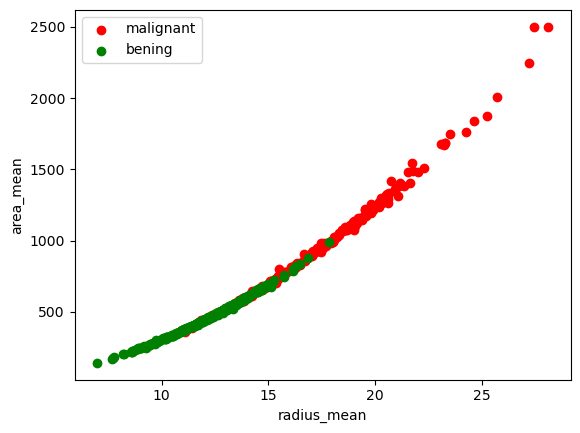

In [66]:
plt.scatter(M.radius_mean,M.area_mean,color="red",label="malignant")
plt.scatter(B.radius_mean,B.area_mean,color="green",label="bening")
plt.legend()
plt.xlabel("radius_mean")
plt.ylabel("area_mean")
plt.show()

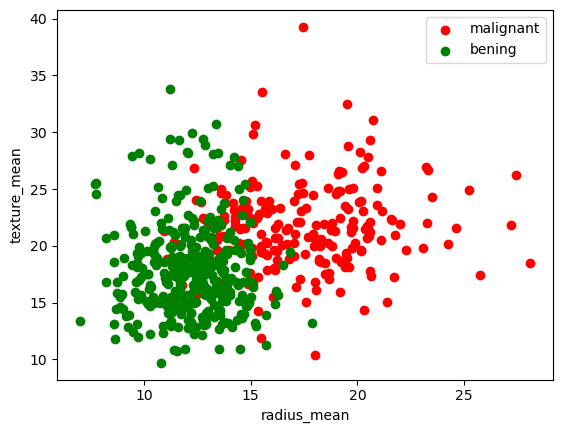

In [67]:
plt.scatter(M.radius_mean,M.texture_mean,color="red",label="malignant")
plt.scatter(B.radius_mean,B.texture_mean,color="green",label="bening")
plt.legend()
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")
plt.show()

In [68]:
data.diagnosis = [1 if each=="M" else 0 for each in data.diagnosis]

In [69]:
data.diagnosis

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [70]:
y=data.diagnosis.values
x_data = data.drop["diagnosis"],axis=1

TypeError: cannot unpack non-iterable int object

In [ ]:
#normalization
x = (x_data - np.min(x_data))/(np.max(x_data)- np.min(x_data))

In [ ]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [ ]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [ ]:
#knn model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train,y_train)

In [ ]:
prediction = knn_predict(x_test)

In [ ]:
prediction

In [ ]:
print("k. {},score {}" .format(3,knn.score(x_test,y_test)))

In [ ]:
test_accuracy = []
for each in range(1,15):
    knn2 = KNeighborsClassifier(n_neighbors=each)
    knn2.fit(x_train,y_train)
    test_accuracy.append(knn2.score(x_test,y_test))
    
plt.figure(figsize=(5,5))
plt.plot(range(1,15),test_accuracy)
plt.title("k values vs. Accuracy")
plt.xlabel("k value")
plt.ylabel("Accuracy")
plt.grid()
plt.show()
print("Best Accuracy is {} with k = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))


In [ ]:
error = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(12,6))
plt.plot(range(1,40),error,color="red",linestye="dashed",marker="o",markerfacecolor="blue",markersize=10)
plt.title("error rate K value")
plt.xlabel("k value")
plt.ylabel("Mean error")
plt.grid()
plt.show()